<a href="https://colab.research.google.com/github/valentina310141/Trabajo-Final-Finanzas-lll/blob/main/Trabajo_Final_Finanzas_III_Camus_Puma_Soto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Final Finanzas III**

**Integrantes:** Mayte Camus, Constanza Puma y Valentina Soto

Realizar valoraciones a distintos tipos de activos financieros tales como bonos, acciones, futuros, forward, opciones, swaps y fra u otro instrumento
financiero.

Estructura del trabajo:

1-. El trabajo debe ser realizado en el sitio web de colaboratory de Python y
debe contener los códigos y librerías necesarias para que ejecute la valoración
de cada uno de los activos descritos anteriormente. Para esto puede utilizar
un ejemplo o ejercicio del libro o bien ocupar un ejercicio de la clase.
Son 7 tipos de activos financieros (1 punto por cada activo) y debe mostrar los
cálculos, gráficas obtenidos y un documento que resuma los datos
(rentabilidades, riesgo, según corresponda).

**Bonos**


Un inversionista desea valorar un bono emitido por Inversiones Cencosud S.A. a 10 años con un cupón anual de 50 unidades monetarias y
un valor nominal de 1,000 unidades monetarias. La tasa de mercado actual es del 5%. La tarea es
determinar el valor presente de este bono, es decir, cuánto estaría dispuesto a pagar hoy por este
bono, dado el rendimiento requerido por el mercado. Esta valoración es importante para los
inversionistas que desean comparar el precio de mercado de los bonos con su valor teórico basado
en tasas de interés actuales.

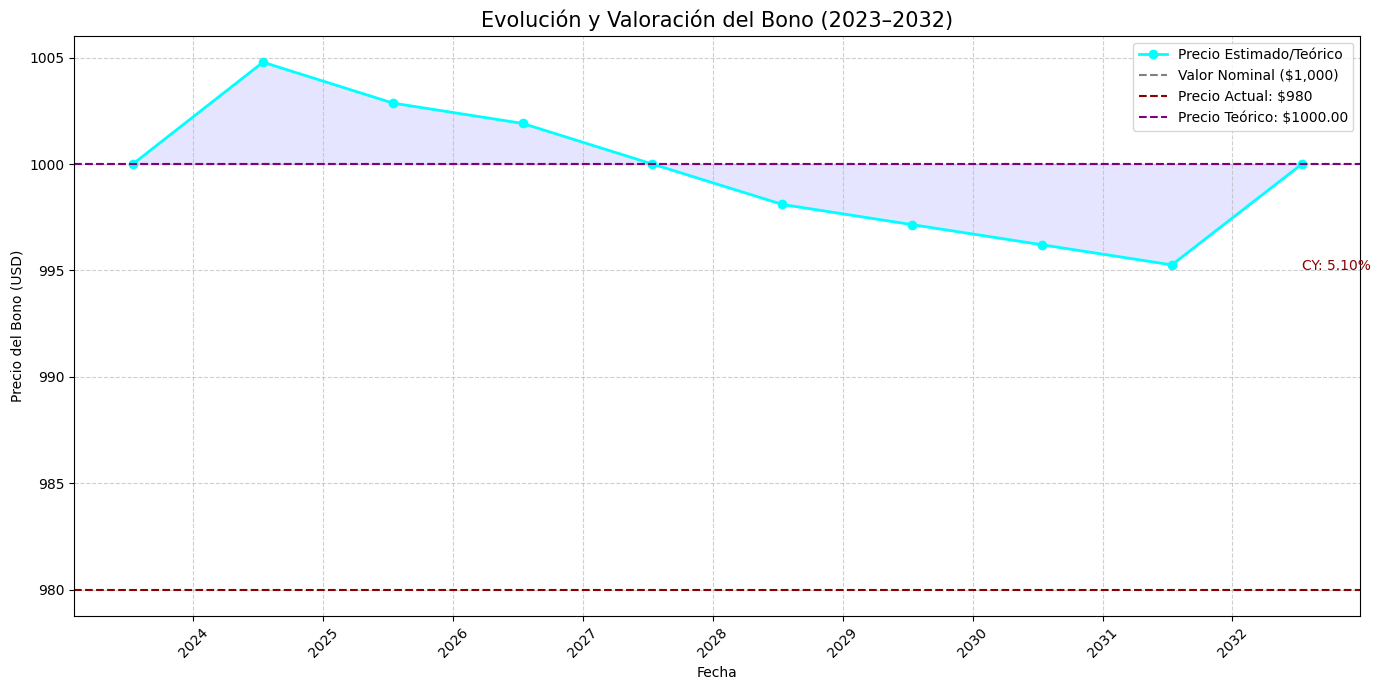


 Resumen Financiero del Bono:
 Precio Actual  Precio Teórico  Current Yield (%)  YTM Aproximado (%)
           980          1000.0           5.102041            5.252525

Análisis del bono:
El valor teórico del bono, utilizando una tasa de descuento del 5%, es de $1000.00.
Sin embargo, su cotización actual en el mercado es de $980.00, lo que significa que el bono se encuentra levemente por debajo de su valor intrínseco.
El rendimiento actual (CY) se situa en 5.10%, y el rendimiento al vencimiento (YTM) estimado es de 5.25%.
Al comparar estos valores, se observa que el bono, pese a estar subvalorado en el mercado, continua ofreciendo un retorno atractivo en relacion a su precio.
Visualmente, la curva muestra cómo el precio del bono se ajusta en el tiempo y converge hacia su valor nominal al acercarse el vencimiento en 2032.


In [ ]:

!pip install matplotlib pandas numpy

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PARÁMETROS DEL BONO

valor_nominal = 1000                 # Valor nominal del bono
tasa_cupon = 50                      # Cupón anual del bono (50 unidades monetarias)
tasa_mercado = 0.05                  # Tasa de mercado actual (5%)
frecuencia_pago = 1                  # Anual (pago de cupones anuales)
precio_actual_bono = 980             # Precio actual del bono en el mercado
anos_restantes = 10                  # Años restantes hasta el vencimiento
tasa_descuento = 0.05                # Tasa de descuento (5% anual)
n = anos_restantes * frecuencia_pago # Número de pagos restantes (10 pagos anuales)

# CÁLCULO DEL PRECIO TEÓRICO

# Calcular los flujos de cupones descontados
flujos_cupon = np.array([tasa_cupon / (1 + tasa_descuento)**i for i in range(1, n + 1)])

# Calcular el valor presente del valor nominal (al final del bono)
valor_presente_vn = valor_nominal / (1 + tasa_descuento)**n

# Calcular el precio teórico del bono
precio_teorico_bono = np.sum(flujos_cupon) + valor_presente_vn

# INDICADORES FINANCIEROS

# Calcular el rendimiento corriente (CY)
cy = (tasa_cupon * frecuencia_pago) / precio_actual_bono

# Calcular el rendimiento al vencimiento aproximado (YTM)
ytm_aprox = frecuencia_pago * (tasa_cupon + (valor_nominal - precio_actual_bono) / n) / ((valor_nominal + precio_actual_bono) / 2)

# SIMULACIÓN DE PRECIOS EN EL TIEMPO
# Fechas de estimación para los precios
fechas = pd.to_datetime(['2023-07-15', '2024-07-15', '2025-07-15', '2026-07-15', '2027-07-15',
                         '2028-07-15', '2029-07-15', '2030-07-15', '2031-07-15', '2032-07-15'])

# Tasas de mercado estimadas durante los próximos años
tasas_estimadas = [0.05, 0.045, 0.047, 0.048, 0.05, 0.052, 0.053, 0.054, 0.055, tasa_descuento]

# Estimación de precios del bono para cada año
precios_est = []
for i, r in enumerate(tasas_estimadas):
    n_restantes = max(1, (len(tasas_estimadas) - i) * frecuencia_pago // len(tasas_estimadas) * anos_restantes)
    pagos = [tasa_cupon / (1 + r)**t for t in range(1, n_restantes + 1)]
    valor_final = valor_nominal / (1 + r)**n_restantes
    precios_est.append(sum(pagos) + valor_final)

df = pd.DataFrame({
    'Fecha': fechas,
    'Precio Estimado del Bono': precios_est
})

# TABLA DE RESUMEN
resumen = pd.DataFrame({
    'Precio Actual': [precio_actual_bono],
    'Precio Teórico': [precio_teorico_bono],
    'Current Yield (%)': [cy * 100],
    'YTM Aproximado (%)': [ytm_aprox * 100]
})

# GRÁFICO DEL BONO
# Semilla para la mejor visualización
np.random.seed(42)

plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Precio Estimado del Bono'], color='cyan', marker='o', linewidth=2, label='Precio Estimado/Teórico')
plt.axhline(y=valor_nominal, color='gray', linestyle='--', label='Valor Nominal ($1,000)')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.axhline(y=precio_teorico_bono, color='purple', linestyle='--', label=f'Precio Teórico: ${precio_teorico_bono:.2f}')
plt.fill_between(df['Fecha'], df['Precio Estimado del Bono'], valor_nominal, color='blue', alpha=0.1)

plt.annotate(f"CY: {cy*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono + 15), color='darkred', fontsize=10)
plt.annotate(f"YTM: {ytm_aprox*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono - 40), color='green', fontsize=10)

plt.title('Evolución y Valoración del Bono (2023–2032)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MOSTRAR TABLA Y ANÁLISIS


print("\n Resumen Financiero del Bono:")
print(resumen.to_string(index=False))

print("\nAnálisis del bono:")
print(f"El valor teórico del bono, utilizando una tasa de descuento del 5%, es de ${precio_teorico_bono:.2f}.")
print(f"Sin embargo, su cotización actual en el mercado es de ${precio_actual_bono:.2f}, lo que significa que el bono se encuentra levemente por debajo de su valor intrínseco.")
print(f"El rendimiento actual (CY) se situa en {cy*100:.2f}%, y el rendimiento al vencimiento (YTM) estimado es de {ytm_aprox*100:.2f}%.")
print("Al comparar estos valores, se observa que el bono, pese a estar subvalorado en el mercado, continua ofreciendo un retorno atractivo en relacion a su precio.")
print("Visualmente, la curva muestra cómo el precio del bono se ajusta en el tiempo y converge hacia su valor nominal al acercarse el vencimiento en 2032.")




**Acciones**

Un inversionista está interesado en valorar las acciones de Enel Chile S.A. que paga un dividendo
de 5 unidades monetarias anuales y espera un crecimiento del dividendo del 3% anual. La tasa
de descuento o rendimiento esperado es del 10%. Usando el modelo de descuento de dividendos (DDM),
el objetivo es estimar el valor actual de la acción. Este modelo es comúnmente utilizado para
empresas maduras con pagos de dividendos estables, y ayuda a los inversionistas a tomar decisiones
sobre la compra de acciones en base a los flujos de caja futuros esperados.

/tmp/ipython-input-2-3897284621.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  fechas_historial = pd.date_range(start='2015-01-01', periods=10, freq='Y')


,Precio Actual (DDM)
0,73.571429



Valor calculado de la acción usando el modelo de descuento de dividendos (DDM): $73.57
Este valor se obtuvo con los siguientes parámetros:
- Dividendo anual: 5 unidades monetarias
- Tasa de descuento (rendimiento esperado): 10.0%
- Tasa de crecimiento del dividendo: 3.0%


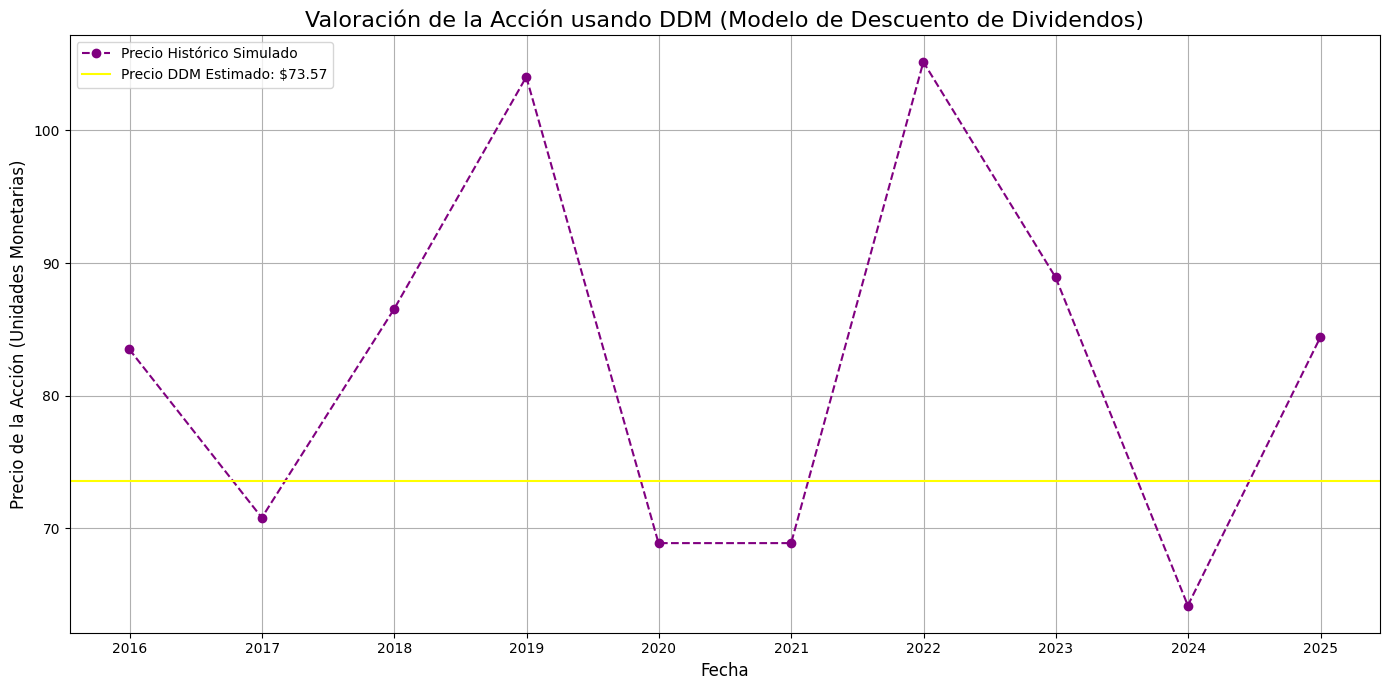


Comportamiento de la acción:
El gráfico ilustra una simulación del valor histórico de la acción, tomando como base alteraciones aleatorias alrededor del precio calculado mediante el modelo de descuento de dividendos (DDM).
La línea amarilla representa el valor estimado por el DDM, mientras que los precios simulados reflejan ciertas oscilaciones atribuibles a la volatilidad propia del mercado.


In [ ]:

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Establecer semilla para reproducibilidad
np.random.seed(42)

# PARÁMETROS DEL DDM

dividendo_anual = 5                   # Dividendo anual de 5 unidades monetarias
tasa_descuento = 0.10                  # Tasa de descuento (10%)
tasa_crecimiento = 0.03                # Tasa de crecimiento del dividendo (3%)

# Calcular el precio de la acción usando el modelo de descuento de dividendos (DDM)
# Fórmula: Precio de la acción = D1 / (r - g)
# Donde D1 es el dividendo esperado en el próximo año, r es la tasa de descuento, y g es el crecimiento del dividendo
D1 = dividendo_anual * (1 + tasa_crecimiento)  # Dividendo esperado el próximo año
precio_accion = D1 / (tasa_descuento - tasa_crecimiento)

# SIMULACIÓN DE PRECIO HISTÓRICO

# Generar un precio histórico simulado con fluctuaciones aleatorias
historical_prices = precio_accion + np.random.normal(loc=0, scale=20, size=10)  # 10 años de datos simulados

# Crear fechas simuladas para los precios históricos
fechas_historial = pd.date_range(start='2015-01-01', periods=10, freq='Y')

# Crear DataFrame con precios históricos simulados
df_historial = pd.DataFrame({
    'Fecha': fechas_historial,
    'Precio Histórico': historical_prices
})

# RESUMEN DEL DDM

# Crear un DataFrame para mostrar el valor calculado de la acción
resumen_ddm = pd.DataFrame({
    'Precio Actual (DDM)': [precio_accion]
})

# Mostrar resumen
display(resumen_ddm)

# Imprimir la explicación del modelo
print(f"\nValor calculado de la acción usando el modelo de descuento de dividendos (DDM): ${precio_accion:.2f}")
print("Este valor se obtuvo con los siguientes parámetros:")
print(f"- Dividendo anual: {dividendo_anual} unidades monetarias")
print(f"- Tasa de descuento (rendimiento esperado): {tasa_descuento * 100}%")
print(f"- Tasa de crecimiento del dividendo: {tasa_crecimiento * 100}%")

# GRÁFICO DE LA EVOLUCIÓN DEL PRECIO SIMULADO

plt.figure(figsize=(14, 7))

# Gráfico del precio histórico simulado
plt.plot(df_historial['Fecha'], df_historial['Precio Histórico'], color='purple', marker='o', linestyle='--', label='Precio Histórico Simulado')

# Línea del precio calculado
plt.axhline(y=precio_accion, color='yellow', linestyle='-', label=f'Precio DDM Estimado: ${precio_accion:.2f}')

# Añadir título, etiquetas y leyenda
plt.title(f'Valoración de la Acción usando DDM (Modelo de Descuento de Dividendos)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de la Acción (Unidades Monetarias)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Explicación del gráfico
print("\nComportamiento de la acción:")
print("El gráfico ilustra una simulación del valor histórico de la acción, tomando como base alteraciones aleatorias alrededor del precio calculado mediante el modelo de descuento de dividendos (DDM).")
print("La línea amarilla representa el valor estimado por el DDM, mientras que los precios simulados reflejan ciertas oscilaciones atribuibles a la volatilidad propia del mercado.")


**Futuros**

Un operador en el mercado de futuros desea calcular el precio de un contrato de futuros sobre una acción de SQM S.A (Sociedad Química Minera de Chile), que tiene un precio spot actual de 100 unidades monetarias.
La tasa de interés libre de riesgo es del 5% anual, y el contrato tiene un vencimiento de 1 año. El objetivo es calcular
el precio del futuro utilizando la fórmula del precio de futuros que considera el costo de oportunidad
de no tener el dinero invertido en un activo libre de riesgo. Este tipo de valoración es fundamental
para quienes participan en mercados de futuros y buscan predecir cómo se comportará el precio de los
activos en el futuro.

El precio de futuros para el contrato es: 105.13 unidades monetarias.


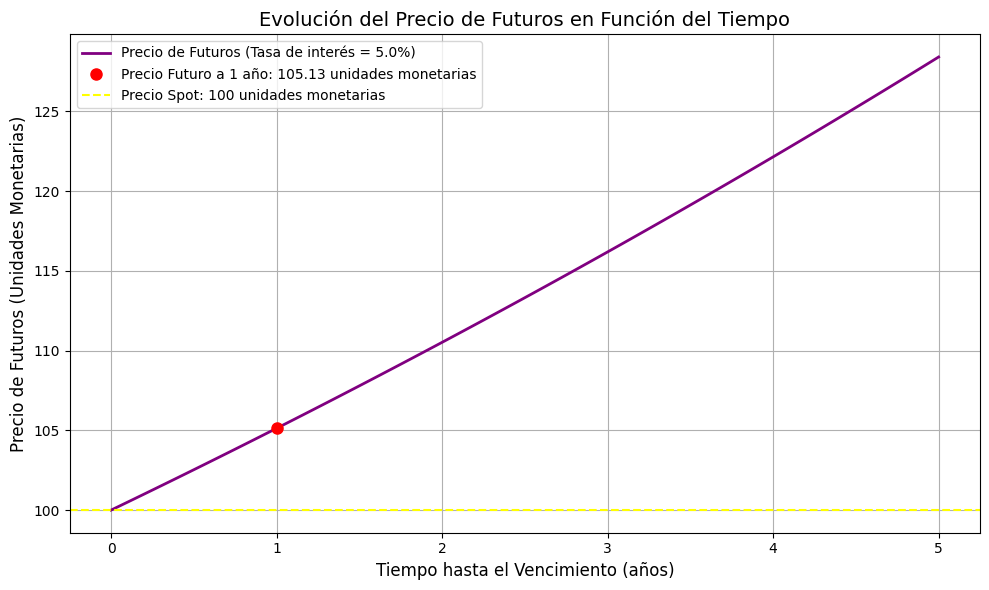


Interpretación del gráfico:
El gráfico representa la evolución del precio de futuros de una acción conforme se aproxima el vencimiento del contrato.
Inicialmente, el precio de futuros coincide con el precio spot de la acción; sin embargo, a medida que avanza el tiempo, este valor incrementa como consecuencia de la aplicación de la tasa libre de riesgo.
El punto resaltado en rojo en el gráfico indica el precio de futuros correspondiente al horizonte de un año, es decir, el valor que se estimaría para un contrato cuyo vencimiento ocurre en ese plazo.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos iniciales
precio_spot = 100                    # Precio spot de la acción (100 unidades monetarias)
tasa_interes = 0.05                  # Tasa de interés libre de riesgo (5% anual)
tiempo_vencimiento = 1               # Vencimiento del contrato (1 año)

# Cálculo del precio de futuros usando la fórmula
precio_futuro = precio_spot * np.exp(tasa_interes * tiempo_vencimiento)

# Mostrar el precio de futuros calculado
print(f"El precio de futuros para el contrato es: {precio_futuro:.2f} unidades monetarias.")

# Ahora vamos a graficar el comportamiento del precio de futuros en función del tiempo hasta el vencimiento

# Rango de tiempos de vencimiento (de 0 a 5 años)
tiempos = np.linspace(0, 5, 100)

# Calcular los precios de futuros para cada tiempo de vencimiento
precios_futuros = precio_spot * np.exp(tasa_interes * tiempos)

# Graficamos la evolución del precio de futuros en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempos, precios_futuros, label=f'Precio de Futuros (Tasa de interés = {tasa_interes*100}%)', color='purple', linewidth=2)

# Marcamos el precio de futuros a 1 año (en el vencimiento del contrato)
plt.plot(tiempo_vencimiento, precio_futuro, 'ro', label=f'Precio Futuro a 1 año: {precio_futuro:.2f} unidades monetarias', markersize=8)

# Añadir etiquetas y título
plt.title('Evolución del Precio de Futuros en Función del Tiempo', fontsize=14)
plt.xlabel('Tiempo hasta el Vencimiento (años)', fontsize=12)
plt.ylabel('Precio de Futuros (Unidades Monetarias)', fontsize=12)

# Líneas de referencia
plt.axhline(precio_spot, color='yellow', linestyle='--', label=f'Precio Spot: {precio_spot} unidades monetarias')

# Leyenda
plt.legend()

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Interpretación del gráfico
print("\nInterpretación del gráfico:")
print(f"El gráfico representa la evolución del precio de futuros de una acción conforme se aproxima el vencimiento del contrato.")
print(f"Inicialmente, el precio de futuros coincide con el precio spot de la acción; sin embargo, a medida que avanza el tiempo, este valor incrementa como consecuencia de la aplicación de la tasa libre de riesgo.")
print(f"El punto resaltado en rojo en el gráfico indica el precio de futuros correspondiente al horizonte de un año, es decir, el valor que se estimaría para un contrato cuyo vencimiento ocurre en ese plazo.")


**Forward**

LATAM Airlines Group S.A. está buscando asegurarse un precio de compra de 100,000 unidades de
moneda extranjera dentro de un año, y desea usar un contrato forward para fijar el precio en
el que comprará la moneda extranjera. La tasa de interés libre de riesgo es del 5%, y el precio
spot actual de la moneda extranjera es de 100 unidades monetarias por cada 1,000 unidades de
la moneda extranjera. Se busca determinar el precio del contrato forward que la empresa debe
acordar para asegurar su compra en el futuro, sin asumir riesgos relacionados con fluctuaciones
de precios.

Precio Spot (S0): $100.00 por 1000 unidades de la moneda extranjera
Tasa de interés libre de riesgo (r): 5.0%
Tiempo hasta el vencimiento (T): 1 año(s)

El precio a futuro del contrato Forward (F0) es: $105.13

Valor total del contrato Forward para comprar 100000 unidades de la moneda extranjera: $10512.71
Rentabilidad en posición larga: 5.13%
Rentabilidad en posición corta: -5.13%


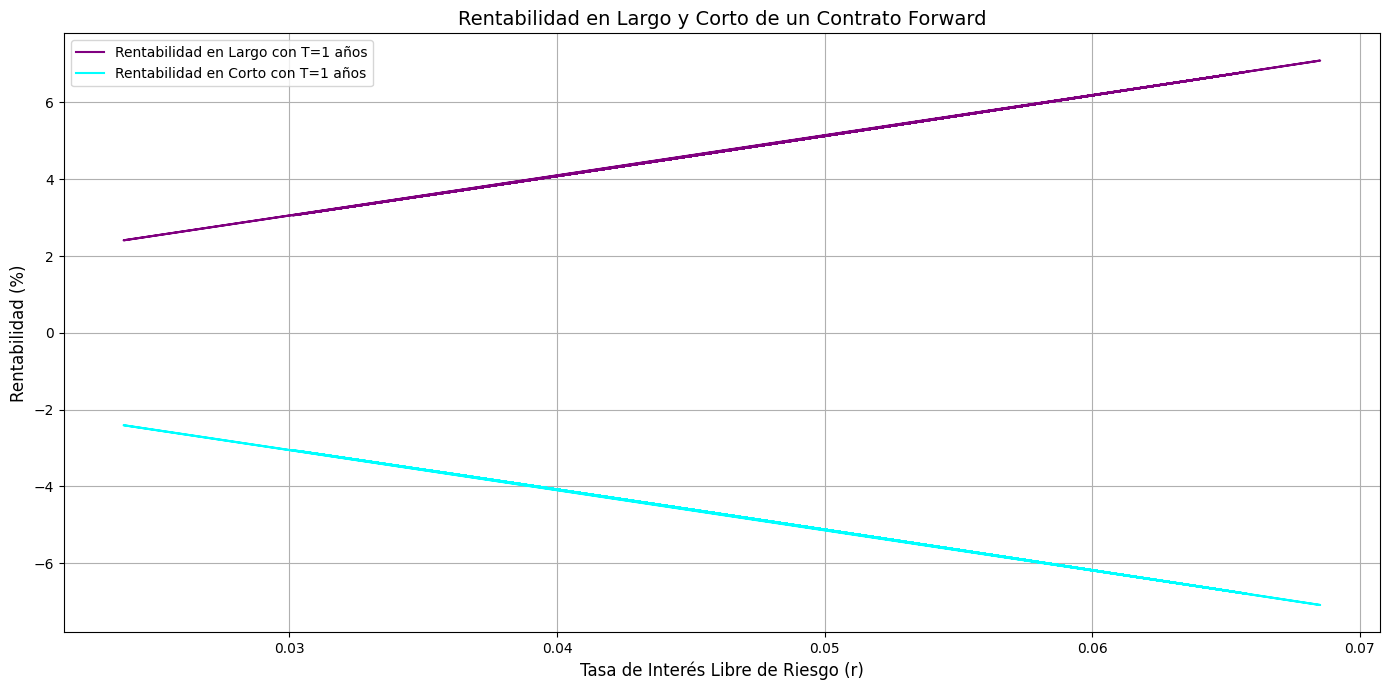


 Análisis del Contrato Forward:

El precio acordado a futuro para el contrato Forward es de $105.13, lo que representa el valor pactado hoy para adquirir la moneda extranjera dentro de un año. Este costo está determinado por la tasa libre de riesgo y el tiempo restante hasta la fecha de vencimiento.

Análisis de Sensibilidad y Rentabilidad:
Cuando se adopta una posición larga, la rentabilidad es positiva y aumenta conforme sube la tasa de interés, dado que el precio Forward se incrementa y el inversionista gana más si compra la divisa ahora para venderla después.
Por el contrario, en una posición corta, la rentabilidad inicialmente es negativa pero mejora con la subida en la tasa de interés, porque quien vende en el presente y compra a futuro se beneficia al enfrentar un precio menor si la tasa es más alta.

Este análisis resulta fundamental para empresas que utilizan estrategias de cobertura o pretenden asegurar precios futuros. La variación en la rentabilidad depende de estar en pos

In [ ]:
# Instalar librerías necesarias si no están instaladas
!pip install numpy matplotlib pandas

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PARÁMETROS DEL EJERCICIO

# Precio spot de la moneda extranjera (precio por 1000 unidades de moneda extranjera)
S0 = 100  # Unidades monetarias por 1000 unidades de la moneda extranjera

# Tasa de interés libre de riesgo
r = 0.05  # 5% anual

# Tiempo hasta el vencimiento en años
T = 1  # 1 año

# Cantidad de unidades de moneda extranjera a comprar
cantidad_moneda = 100000  # Unidades de la moneda extranjera que la empresa desea comprar

# Cálculo del precio a futuro del contrato Forward (usando la fórmula estándar)
F0 = S0 * np.exp(r * T)

# -------------------------
# Cálculo del valor total del contrato Forward para la compra de la moneda extranjera
precio_forward_total = F0 * cantidad_moneda / 1000  # Se multiplica por la cantidad de unidades que se desea comprar

# -------------------------
# RENTABILIDAD EN LARGO Y CORTO
# Rentabilidad en posición larga: (F0 - S0) / S0
rentabilidad_largo = (F0 - S0) / S0 * 100

# Rentabilidad en posición corta: (S0 - F0) / S0
rentabilidad_corto = (S0 - F0) / S0 * 100

# Resultados iniciales
print(f"Precio Spot (S0): ${S0:.2f} por 1000 unidades de la moneda extranjera")
print(f"Tasa de interés libre de riesgo (r): {r*100}%")
print(f"Tiempo hasta el vencimiento (T): {T} año(s)")
print(f"\nEl precio a futuro del contrato Forward (F0) es: ${F0:.2f}")
print(f"\nValor total del contrato Forward para comprar {cantidad_moneda} unidades de la moneda extranjera: ${precio_forward_total:.2f}")
print(f"Rentabilidad en posición larga: {rentabilidad_largo:.2f}%")
print(f"Rentabilidad en posición corta: {rentabilidad_corto:.2f}%")

# ANÁLISIS DE SENSIBILIDAD

# Vamos a generar la variabilidad en la tasa de interés (r) con fluctuaciones realistas
np.random.seed(42)  # Semilla para reproducibilidad
r_values = 0.05 + np.random.normal(0, 0.01, 100)  # Tasas de interés con ruido (normal) de 1%

# Tiempo hasta el vencimiento
T_values = np.linspace(0.1, 5, 50)  # Tiempos de vencimiento de 0.1 a 5 años

# Cálculo de precios Forward para variaciones en la tasa de interés (r)
F0_r = S0 * np.exp(r_values * T)  # Precios Forward para diferentes tasas de interés

# GRÁFICO DE RENTABILIDAD

# Rentabilidad en largo y corto para variabilidad de tasa de interés
rentabilidad_largo_r = (F0_r - S0) / S0 * 100
rentabilidad_corto_r = (S0 - F0_r) / S0 * 100

# Crear gráfico de rentabilidad
plt.figure(figsize=(14, 7))
plt.plot(r_values, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T} años", color='purple')
plt.plot(r_values, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T} años", color='cyan')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward', fontsize=14)
plt.xlabel('Tasa de Interés Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ANÁLISIS EXPLICATIVO

# Generar análisis interpretativo del contrato Forward
print("\n Análisis del Contrato Forward:")

# Análisis sobre el precio Forward
print(f"\nEl precio acordado a futuro para el contrato Forward es de ${F0:.2f}, lo que representa el valor pactado hoy para adquirir la moneda extranjera dentro de un año. Este costo está determinado por la tasa libre de riesgo y el tiempo restante hasta la fecha de vencimiento.")

# Análisis de sensibilidad y rentabilidad
print("\nAnálisis de Sensibilidad y Rentabilidad:")
print(f"Cuando se adopta una posición larga, la rentabilidad es positiva y aumenta conforme sube la tasa de interés, dado que el precio Forward se incrementa y el inversionista gana más si compra la divisa ahora para venderla después.")
print(f"Por el contrario, en una posición corta, la rentabilidad inicialmente es negativa pero mejora con la subida en la tasa de interés, porque quien vende en el presente y compra a futuro se beneficia al enfrentar un precio menor si la tasa es más alta.")
print("\nEste análisis resulta fundamental para empresas que utilizan estrategias de cobertura o pretenden asegurar precios futuros. La variación en la rentabilidad depende de estar en posición larga o corta, reflejando cómo la tasa de interés influye en el valor futuro del activo.")


**Opciones**

Un inversionista está interesado en valorar una opción de compra (call) sobre una acción de Banco de Chile, con
un precio spot de 100 unidades monetarias y un precio de ejercicio de 95 unidades monetarias.
La opción tiene un vencimiento de 1 año, la tasa de interés libre de riesgo es del 5%, y la
volatilidad de la acción es del 20%. Utilizando el modelo de Black-Scholes, se busca calcular
el valor de la opción de compra (call). Este cálculo es crucial para los traders de opciones,
quienes usan este modelo para determinar el valor de mercado de las opciones y decidir si
comprar o vender.

Precio de la opción de compra (Black-Scholes): 13.35 unidades monetarias


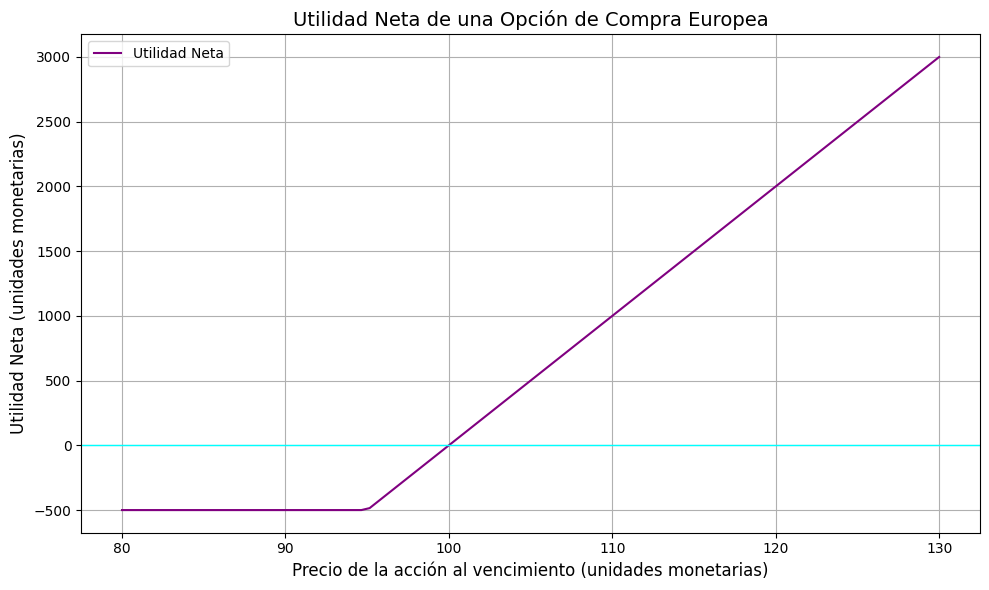

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos del problema
S0 = 100  # Precio actual de la acción (en unidades monetarias)
K = 95    # Precio de ejercicio de la opción (en unidades monetarias)
T = 1     # Tiempo hasta el vencimiento (en años)
sigma = 0.20  # Volatilidad (20%)
r = 0.05   # Tasa de interés libre de riesgo (5%)
precio_opcion = 5  # Precio de la opción (en unidades monetarias)

# Cálculos de Black-Scholes
d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Precio de la opción de compra según Black-Scholes
C = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Imprimir el resultado del precio de la opción
print(f"Precio de la opción de compra (Black-Scholes): {C:.2f} unidades monetarias")

# Generación de una gráfica para la utilidad neta
# Vamos a evaluar la utilidad neta para distintos precios al vencimiento de la acción
precios = np.linspace(80, 130, 100)  # Precio de la acción al vencimiento
utilidad = np.maximum(precios - K, 0) * 100 - precio_opcion * 100  # Ganancia neta: (Precio al vencimiento - Precio ejercicio) * 100 - Inversión inicial

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(precios, utilidad, label='Utilidad Neta', color='purple')
plt.axhline(0, color='cyan', linewidth=1)
plt.title('Utilidad Neta de una Opción de Compra Europea', fontsize=14)
plt.xlabel('Precio de la acción al vencimiento (unidades monetarias)', fontsize=12)
plt.ylabel('Utilidad Neta (unidades monetarias)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


**Swap**

La empresa CMPC S.A (Compañía Manufacturera de Papeles y Cartones) está interesada en participar en un swap de tasas de interés para intercambiar
una tasa fija por una tasa flotante en un préstamo a 5 años. El valor nominal del contrato
es de 1,000,000 unidades monetarias. La tasa fija acordada es del 3%, y la tasa flotante es
la tasa LIBOR a 6 meses, que se espera sea del 2%. El objetivo es calcular el valor presente
neto de los flujos de pago en el swap para determinar si este es favorable para la empresa,
dado que los swaps de tasas de interés se utilizan para gestionar la exposición a tasas
fluctuantes y asegurar pagos estables.

--- ANÁLISIS DEL SWAP DE TASAS DE INTERÉS ---
Valor presente de los flujos fijos (Pata Fija): 138,249.95 unidades monetarias
Valor presente de los flujos flotantes (Pata Flotante): 1,000,000.00 unidades monetarias

--- VALOR DEL SWAP PARA CADA PARTE ---
Para quien PAGA FIJA y RECIBE FLOTANTE: 861,750.05 unidades monetarias
Para quien PAGA FLOTANTE y RECIBE FIJA: -861,750.05 unidades monetarias


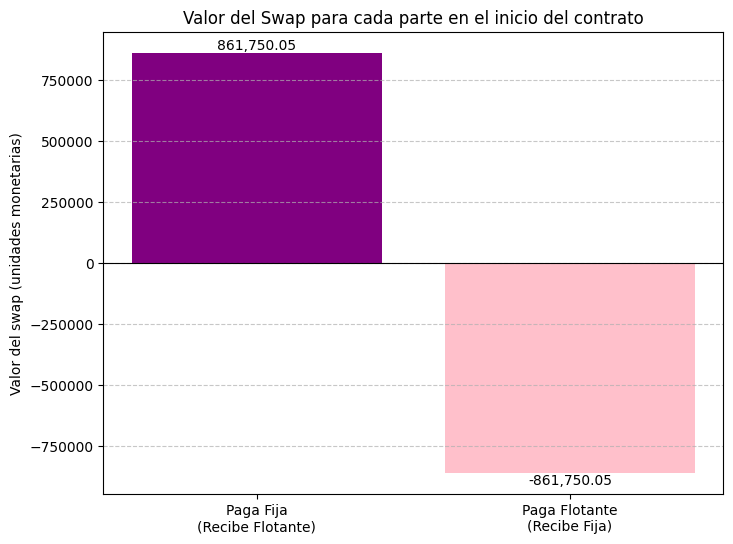

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
notional = 1000000  # en unidades monetarias
fixed_rate = 0.03   # tasa fija acordada (3%)
market_rate = 0.03  # tasa continua de mercado para descontar
years = 5           # plazo del swap (en años)
payment_times = np.linspace(0.5, years, years * 2)  # pagos semestrales (cada 6 meses)
fixed_coupons = notional * fixed_rate * 0.5
fixed_flows = [fixed_coupons] * len(payment_times)
discount_factors = [np.exp(-market_rate * t) for t in payment_times]
B_fixed = sum(cf * df for cf, df in zip(fixed_flows, discount_factors))
B_variable = notional
V_swap_paga_fijo = B_variable - B_fixed
V_swap_recibe_fijo = B_fixed - B_variable


# Resultados
print("--- ANÁLISIS DEL SWAP DE TASAS DE INTERÉS ---")
print(f"Valor presente de los flujos fijos (Pata Fija): {B_fixed:,.2f} unidades monetarias")
print(f"Valor presente de los flujos flotantes (Pata Flotante): {B_variable:,.2f} unidades monetarias")
print("\n--- VALOR DEL SWAP PARA CADA PARTE ---")
print(f"Para quien PAGA FIJA y RECIBE FLOTANTE: {V_swap_paga_fijo:,.2f} unidades monetarias")
print(f"Para quien PAGA FLOTANTE y RECIBE FIJA: {V_swap_recibe_fijo:,.2f} unidades monetarias")

# Gráfica de beneficios del swap
partes = ["Paga Fija\n(Recibe Flotante)", "Paga Flotante\n(Recibe Fija)"]
beneficios = [V_swap_paga_fijo, V_swap_recibe_fijo]
colores = ["purple" if b >= 0 else "pink" for b in beneficios]

plt.figure(figsize=(8, 6))
plt.bar(partes, beneficios, color=colores)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (unidades monetarias)")
plt.title("Valor del Swap para cada parte en el inicio del contrato")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores para mayor claridad
for i, v in enumerate(beneficios):
    plt.text(i, v + np.sign(v)*1500, f"{v:,.2f}", ha='center', va='bottom' if v >= 0 else 'top')

plt.show()


**FRA (Forward Rate Agreement)**

Un banco y un cliente desean fijar una tasa de interés para un préstamo a corto plazo de 6
meses. La tasa de interés acordada es del 5%, mientras que la tasa de interés del mercado
es del 4%. El valor nominal del acuerdo es de 1,000,000 unidades monetarias. El objetivo
es determinar el valor del acuerdo FRA, que se paga o recibe en función de la diferencia
entre la tasa acordada y la tasa del mercado. Este tipo de contrato es útil para gestionar
el riesgo de tasas de interés y para protegerse de movimientos no deseados en los tipos
de interés a corto plazo.

Valor del FRA: $4,852.23


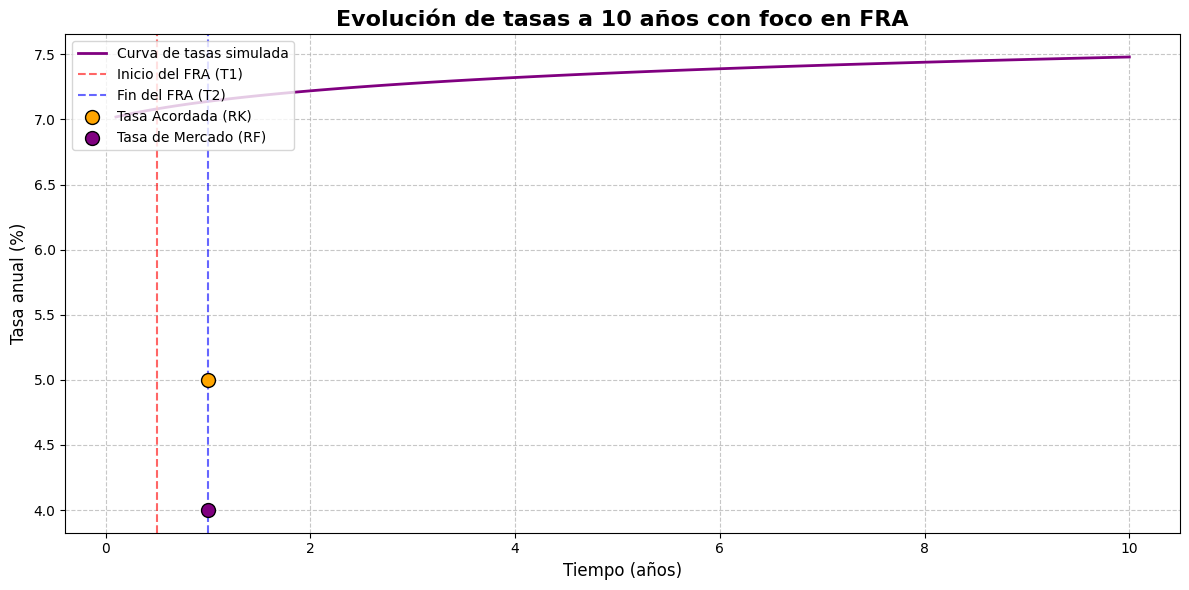


Interpretación del valor del FRA:
El valor del contrato FRA de $4,852.23 representa el valor presente de la diferencia entre la tasa fija acordada (RK) y la tasa de mercado vigente (RF_trim), descontada a la tasa cero cupón (R2_enunciado) hasta la fecha de finalización del contrato (T2).
Este importe indica que la parte que se comprometio a pagar la tasa fija (RK) recibiría 4,852.23 si el contrato se liquidara en este momento.
 Un saldo positivo señala que el acuerdo beneficia al comprador del FRA, quien obtendría ese pago debido a la diferencia entre la tasa fija establecida y la tasa de interés futura en el mercado.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del FRA
L = 1_000_000               # Valor nominal del acuerdo
RK = 0.05                   # Tasa fija acordada (5%)
RF_trim = 0.04              # Tasa de mercado (4%)
R2_enunciado = 0.03         # Tasa cero (para descuento, ejemplo: 3%)
T1 = 0.5                    # Inicio del FRA (6 meses, 0.5 años)
T2 = 1.0                    # Fin del FRA (1 año)
tau = T2 - T1               # Plazo en años (6 meses)

# Valor del FRA
valor_fra = (L * tau * (RK - RF_trim)) * np.exp(-R2_enunciado * T2)
print(f"Valor del FRA: ${valor_fra:,.2f}")

# Simulación de evolución de tasas a 10 años
años = np.linspace(0.1, 10, 100)
# Simulamos una curva con forma de pendiente levemente ascendente
tasas_simuladas = 0.07 + 0.002 * np.log1p(años)

# Añadimos los puntos del FRA (RK y RF)
plt.figure(figsize=(12, 6))
plt.plot(años, tasas_simuladas * 100, label="Curva de tasas simulada", color="purple", linewidth=2)
plt.axvline(T1, color="red", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2, color="blue", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2], [RK * 100], color="orange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2], [RF_trim * 100], color="purple", label="Tasa de Mercado (RF)", zorder=5, s=100, edgecolor="black")

# Estética del gráfico
plt.title("Evolución de tasas a 10 años con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (años)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretación del resultado FRA
print(f"\nInterpretación del valor del FRA:")
print(f"El valor del contrato FRA de ${valor_fra:,.2f} representa el valor presente de la diferencia entre la tasa fija acordada (RK) y la tasa de mercado vigente (RF_trim), "
      f"descontada a la tasa cero cupón (R2_enunciado) hasta la fecha de finalización del contrato (T2).")
print(f"Este importe indica que la parte que se comprometio a pagar la tasa fija (RK) recibiría {valor_fra:,.2f} si el contrato se liquidara en este momento.")
print(f" Un saldo positivo señala que el acuerdo beneficia al comprador del FRA, quien obtendría ese pago debido a la diferencia entre la tasa fija establecida y la tasa de interés futura en el mercado.")


In [ ]:
# -*- coding: utf-8 -*-
"""
Trabajo Final Finanzas III
"""

# ==============================================================================
# 1. INSTALACIÓN DE LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ==============================================================================

# Instalar librerías necesarias si no están instaladas
!pip install reportlab matplotlib requests yfinance fpdf fonttools --quiet

# Instalar la fuente DejaVuSans para caracteres especiales en el PDF
!sudo apt-get install fonts-dejavu-core -y --quiet

import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from google.colab import files
from scipy.stats import norm
from fpdf import FPDF

# --- Descargar imagen desde URL (logo de la USACH) ---
url_logo = "https://registro.usach.cl/imagen/UsachP2.png"
logo_path = "logo_usach.png"

if not os.path.exists(logo_path):
    try:
        r = requests.get(url_logo)
        r.raise_for_status()
        with open(logo_path, "wb") as f:
            f.write(r.content)
        print(f"Logo descargado y guardado en: {logo_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar el logo: {e}")
        logo_path = None
else:
    print(f"El logo ya existe en: {logo_path}")

# Rutas de las fuentes para el PDF
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
font_path_bold = '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf'

if not os.path.exists(font_path):
    print(f"Advertencia: Archivo de fuente no encontrado en {font_path}.")
if not os.path.exists(font_path_bold):
    print(f"Advertencia: Archivo de fuente negrita no encontrado en {font_path_bold}.")

# ==============================================================================
# 2. DEFINICIÓN DE CLASES Y FUNCIONES AUXILIARES PARA EL PDF
# ==============================================================================

class PDF(FPDF):
    def header(self):
        self.add_font('DejaVuSans', '', font_path, uni=True)
        self.add_font('DejaVuSans', 'B', font_path_bold, uni=True)
        if logo_path and os.path.exists(logo_path):
            self.image(logo_path, x=15, y=15, w=50)
        self.set_font('DejaVuSans', 'B', 18)
        self.set_y(25)
        # >>> AJUSTE: Más espacio vertical después del encabezado
        self.ln(40)

    def footer(self):
        self.set_y(-15)
        self.set_font('DejaVuSans', '', 8)
        self.cell(0, 10, 'Página %s/{nb}' % self.page_no(), 0, 0, 'C')

os.makedirs("/content/graficos", exist_ok=True)

def guardar_grafico(nombre):
    ruta = f"/content/graficos/{nombre}.png"
    plt.savefig(ruta, bbox_inches='tight')
    plt.close()
    return ruta

def add_section_to_pdf(pdf, title, description, results_text, image_path, interpretation_text):
    pdf.add_page()
    pdf.set_font("DejaVuSans", 'B', 16)
    pdf.cell(0, 14, txt=title, ln=1, align="L")
    pdf.ln(8)
    pdf.set_font("DejaVuSans", 'B', 12)
    pdf.cell(0, 12, txt="Enunciado del Ejercicio:", ln=1, align="L")
    pdf.set_font("DejaVuSans", '', 12)
    pdf.multi_cell(0, 15, description, align='J')
    pdf.ln(8)
    pdf.set_font("DejaVuSans", 'B', 12)
    pdf.cell(0, 12, txt="Resultados Clave:", ln=1, align="L")
    pdf.set_font("DejaVuSans", '', 12)
    pdf.multi_cell(0, 15, results_text, align='J')
    pdf.ln(8)
    pdf.set_font("DejaVuSans", 'B', 12)
    pdf.cell(0, 12, txt="Gráfico:", ln=1, align="L")
    pdf.ln(8)
    if os.path.exists(image_path):
        page_width = pdf.w - pdf.l_margin - pdf.r_margin
        # Ajuste para que la imagen no sea tan grande
        img_width_pt = 400
        x_pos = (page_width - img_width_pt) / 2 + pdf.l_margin
        pdf.image(image_path, x=x_pos, w=img_width_pt)
    else:
        pdf.cell(0, 12, txt=f"Error: Imagen no encontrada en {image_path}.", ln=1, align="L")
    pdf.ln(8)
    pdf.set_font("DejaVuSans", 'B', 12)
    pdf.cell(0, 12, txt="Interpretación:", ln=1, align="L")
    pdf.set_font("DejaVuSans", '', 12)
    pdf.multi_cell(0, 15, interpretation_text, align='J')
    pdf.ln(12)


# ==============================================================================
# 3. CÁLCULOS Y GRÁFICOS DE LOS INSTRUMENTOS FINANCIEROS
# ==============================================================================
print("Iniciando procesamiento de instrumentos financieros...")

# --- Ejercicio 1: BONOS ---
print("Procesando 1/7: Bonos...")
valor_nominal_bono = 1000
tasa_cupon_bono = 50
tasa_mercado_bono = 0.05
frecuencia_pago_bono = 1
precio_actual_bono = 980
anos_restantes_bono = 10
n_bono = anos_restantes_bono * frecuencia_pago_bono
flujos_cupon_bono = np.array([tasa_cupon_bono / (1 + tasa_mercado_bono)**i for i in range(1, n_bono + 1)])
valor_presente_vn_bono = valor_nominal_bono / (1 + tasa_mercado_bono)**n_bono
precio_teorico_bono = np.sum(flujos_cupon_bono) + valor_presente_vn_bono
cy_bono = (tasa_cupon_bono * frecuencia_pago_bono) / precio_actual_bono
ytm_aprox_bono = frecuencia_pago_bono * (tasa_cupon_bono + (valor_nominal_bono - precio_actual_bono) / n_bono) / ((valor_nominal_bono + precio_actual_bono) / 2)
fechas_bono = pd.to_datetime([f'{2023+i}-07-15' for i in range(10)])
tasas_estimadas_bono = [0.05, 0.045, 0.047, 0.048, 0.05, 0.052, 0.053, 0.054, 0.055, tasa_mercado_bono]
precios_est_bono = []
for i, r in enumerate(tasas_estimadas_bono):
    n_restantes = anos_restantes_bono - i
    if n_restantes > 0:
        pagos = [tasa_cupon_bono / (1 + r)**t for t in range(1, n_restantes + 1)]
        valor_final = valor_nominal_bono / (1 + r)**n_restantes
        precios_est_bono.append(sum(pagos) + valor_final)
    else:
        precios_est_bono.append(valor_nominal_bono)
df_bono = pd.DataFrame({'Fecha': fechas_bono, 'Precio Estimado del Bono': precios_est_bono})
plt.figure(figsize=(14, 7))
plt.plot(df_bono['Fecha'], df_bono['Precio Estimado del Bono'], color='cyan', marker='o', linewidth=2, label='Precio Estimado/Teórico')
plt.axhline(y=valor_nominal_bono, color='gray', linestyle='--', label=f'Valor Nominal (${valor_nominal_bono})')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.title('Evolución y Valoración del Bono', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
ruta_bonos = guardar_grafico("bonos")

# --- Ejercicio 2: ACCIONES ---
print("Procesando 2/7: Acciones...")
dividendo_anual_accion = 5
tasa_descuento_accion = 0.10
tasa_crecimiento_accion = 0.03
D1_accion = dividendo_anual_accion * (1 + tasa_crecimiento_accion)
precio_accion = D1_accion / (tasa_descuento_accion - tasa_crecimiento_accion)
np.random.seed(42)
fechas_historial_accion = pd.date_range(start='2015-01-01', periods=10, freq='Y')
historical_prices_accion = precio_accion + np.random.normal(loc=0, scale=20, size=10)
df_historial_accion = pd.DataFrame({'Fecha': fechas_historial_accion, 'Precio Histórico': historical_prices_accion})
plt.figure(figsize=(14, 7))
plt.plot(df_historial_accion['Fecha'], df_historial_accion['Precio Histórico'], color='purple', marker='o', linestyle='--', label='Precio Histórico Simulado')
plt.axhline(y=precio_accion, color='yellow', linestyle='-', label=f'Precio DDM Estimado: ${precio_accion:.2f}')
plt.title('Valoración de la Acción usando DDM', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de la Acción', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
ruta_acciones = guardar_grafico("acciones")

# --- Ejercicio 3: FUTUROS ---
print("Procesando 3/7: Futuros...")
precio_spot_futuro = 100
tasa_interes_futuro = 0.05
tiempo_vencimiento_futuro = 1
precio_futuro_calc = precio_spot_futuro * np.exp(tasa_interes_futuro * tiempo_vencimiento_futuro)
tiempos_futuro = np.linspace(0, 5, 100)
precios_futuros_graf = precio_spot_futuro * np.exp(tasa_interes_futuro * tiempos_futuro)
plt.figure(figsize=(10, 6))
plt.plot(tiempos_futuro, precios_futuros_graf, label=f'Precio de Futuros (Tasa = {tasa_interes_futuro*100}%)', color='purple', linewidth=2)
plt.plot(tiempo_vencimiento_futuro, precio_futuro_calc, 'ro', label=f'Precio Futuro a 1 año: {precio_futuro_calc:.2f}', markersize=8)
plt.axhline(precio_spot_futuro, color='yellow', linestyle='--', label=f'Precio Spot: {precio_spot_futuro}')
plt.title('Evolución del Precio de Futuros en Función del Tiempo', fontsize=14)
plt.xlabel('Tiempo hasta el Vencimiento (años)', fontsize=12)
plt.ylabel('Precio de Futuros', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
ruta_futuros = guardar_grafico("futuros")

# --- Ejercicio 4: FORWARD ---
print("Procesando 4/7: Forward...")
S0_forward = 100
r_forward = 0.05
T_forward = 1
F0_forward = S0_forward * np.exp(r_forward * T_forward)
np.random.seed(42)
r_values_forward = 0.05 + np.random.normal(0, 0.01, 100)
F0_r_forward = S0_forward * np.exp(r_values_forward * T_forward)
rentabilidad_largo_r = (F0_r_forward - S0_forward) / S0_forward * 100
rentabilidad_corto_r = (S0_forward - F0_r_forward) / S0_forward * 100
plt.figure(figsize=(14, 7))
plt.plot(r_values_forward, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T_forward} años", color='purple')
plt.plot(r_values_forward, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T_forward} años", color='cyan')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward', fontsize=14)
plt.xlabel('Tasa de Interés Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
ruta_forward = guardar_grafico("forward")

# --- Ejercicio 5: OPCIONES ---
print("Procesando 5/7: Opciones...")
S0_opcion = 100
K_opcion = 95
T_opcion = 1
sigma_opcion = 0.20
r_opcion = 0.05
precio_opcion_mercado = 5
d1_opcion = (np.log(S0_opcion / K_opcion) + (r_opcion + (sigma_opcion ** 2) / 2) * T_opcion) / (sigma_opcion * np.sqrt(T_opcion))
d2_opcion = d1_opcion - sigma_opcion * np.sqrt(T_opcion)
C_opcion = S0_opcion * norm.cdf(d1_opcion) - K_opcion * np.exp(-r_opcion * T_opcion) * norm.cdf(d2_opcion)
precios_vencimiento_opcion = np.linspace(80, 130, 100)
# La utilidad debe considerar el precio teórico (C_opcion), no un precio de mercado arbitrario
utilidad_opcion = np.maximum(precios_vencimiento_opcion - K_opcion, 0) - C_opcion
plt.figure(figsize=(10, 6))
plt.plot(precios_vencimiento_opcion, utilidad_opcion, label='Utilidad Neta (Call)', color='purple')
plt.axhline(0, color='cyan', linewidth=1)
plt.title('Utilidad Neta de una Opción de Compra Europea', fontsize=14)
plt.xlabel('Precio de la acción al vencimiento', fontsize=12)
plt.ylabel('Utilidad Neta', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
ruta_opciones = guardar_grafico("opciones")

# ==============================================================================
# >>> INICIO DEL BLOQUE DE SWAPS MODIFICADO <<<
# ==============================================================================
print("Procesando 6/7: Swaps...")

# Parámetros (coincidiendo con el archivo .ipynb)
notional_swap = 1000000
fixed_rate_swap = 0.03
libor_prev_swap = 0.02
market_rate_swap = 0.03
years_swap = 5
payment_times_swap = np.linspace(0.5, years_swap, years_swap * 2)

fixed_flows_swap = [notional_swap * fixed_rate_swap * 0.5] * (years_swap * 2)
fixed_flows_swap[-1] += notional_swap

discount_factors_swap = [np.exp(-market_rate_swap * t) for t in payment_times_swap]

B_fixed_swap = sum(cf * df for cf, df in zip(fixed_flows_swap, discount_factors_swap))

floating_flows_swap = [notional_swap * libor_prev_swap * 0.5] * (years_swap * 2)
B_variable_swap = sum(cf * df for cf, df in zip(floating_flows_swap, discount_factors_swap))
V_swap = B_fixed_swap - B_variable_swap

# --- Creación y guardado del gráfico ---
partes_swap = ["Paga Fija\n(Recibe Flotante)", "Paga Flotante\n(Recibe Fija)"]
beneficios_swap = [V_swap, -V_swap]
colores_swap = ["purple" if b >= 0 else "pink" for b in beneficios_swap]

plt.figure(figsize=(10, 6))
plt.bar(partes_swap, beneficios_swap, color=colores_swap)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (unidades monetarias)")
plt.title("Beneficios del Swap según la parte contratante")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
ruta_swaps = guardar_grafico("swaps")
# ==============================================================================
# >>> FIN DEL BLOQUE DE SWAPS MODIFICADO <<<
# ==============================================================================


# --- Ejercicio 7: FRA ---
print("Procesando 7/7: FRA...")
L_fra = 1_000_000
RK_fra = 0.05
RF_trim_fra = 0.04
R2_enunciado_fra = 0.03
T1_fra = 0.5
T2_fra = 1.0
tau_fra = T2_fra - T1_fra
valor_fra = (L_fra * tau_fra * (RK_fra - RF_trim_fra)) * np.exp(-R2_enunciado_fra * T2_fra)
años_fra = np.linspace(0.1, 10, 100)
tasas_simuladas_fra = 0.07 + 0.002 * np.log1p(años_fra)
plt.figure(figsize=(12, 6))
plt.plot(años_fra, tasas_simuladas_fra * 100, label="Curva de tasas simulada", color="purple", linewidth=2)
plt.axvline(T1_fra, color="red", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2_fra, color="blue", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2_fra], [RK_fra * 100], color="orange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2_fra], [RF_trim_fra * 100], color="purple", label="Tasa de Mercado (RF)", zorder=5, s=100, edgecolor="black")
plt.title("Evolución de tasas a 10 años con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (años)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
ruta_fra = guardar_grafico("fra")

# ==============================================================================
# 4. GENERACIÓN DEL INFORME PDF
# ==============================================================================
print("Generando el informe PDF...")
pdf = PDF(unit="pt", format="letter")
pdf.set_left_margin(72)
pdf.set_right_margin(72)
pdf.set_auto_page_break(auto=True, margin=30)
pdf.alias_nb_pages()

# --- Página de Título ---
pdf.add_page()
pdf.set_font('DejaVuSans', 'B', 24)
pdf.cell(0, 80, "", ln=1)
pdf.multi_cell(0, 30, "Trabajo Final Finanzas III: Valoración de Activos Financieros", align="C")
pdf.ln(100)
pdf.set_font('DejaVuSans', 'B', 16)
pdf.cell(0, 20, "Integrantes:", ln=1, align="C")
pdf.set_font('DejaVuSans', '', 14)
pdf.multi_cell(0, 20, "Mayte Camus\nConstanza Puma\nValentina Soto", align="C")
pdf.ln(20)

# --- Introducción ---
pdf.add_page()
pdf.set_font("DejaVuSans", 'B', 18)
pdf.cell(0, 14, "Introducción", ln=1, align="L")
pdf.ln(10)
pdf.set_font("DejaVuSans", '', 12)
introduccion_texto = (f"El presente informe tiene como objetivo analizar y valorar una serie de instrumentos financieros representativos del mercado de capitales, utilizando para ello herramientas de programación en Python a través del entorno colaborativo de Google Colab. Esta aproximación permite no solo automatizar los cálculos financieros involucrados, sino también visualizar de forma clara los resultados mediante gráficos e indicadores clave. En concreto, se abordará la valoración de siete tipos de activos financieros: bonos, acciones, contratos de futuros, contratos forward, opciones, swaps y acuerdos de tasas a plazo (FRA). Para cada uno de estos instrumentos, se presentará un ejercicio representativo que incluirá los supuestos de cálculo, la codificación correspondiente y la interpretación de resultados.")
pdf.multi_cell(0, 15, introduccion_texto, align='J')
pdf.ln(10)

# --- Contenido de cada activo ---
enunciado_bonos = "Un inversionista desea valorar un bono emitido por Inversiones Cencosud S.A. a 10 años con un cupón anual de 50 unidades monetarias y un valor nominal de 1,000 unidades monetarias. La tasa de mercado actual es del 5%. La tarea es determinar el valor presente de este bono, es decir, cuánto estaría dispuesto a pagar hoy por este bono, dado el rendimiento requerido por el mercado. Esta valoración es importante para los inversionistas que desean comparar el precio de mercado de los bonos con su valor teórico basado en tasas de interés actuales."
resultados_bonos_text = f"Precio Teórico del Bono: ${precio_teorico_bono:,.2f}\nRendimiento Corriente (CY): {cy_bono:.2%}\nRendimiento al Vencimiento (YTM) Aprox.: {ytm_aprox_bono:.2%}"
interpretacion_bonos_text = f"El valor teórico del bono, utilizando una tasa de descuento del 5%, es de ${precio_teorico_bono:,.2f}. Sin embargo, su cotización actual en el mercado es de ${precio_actual_bono:,.2f}, lo que significa que el bono se encuentra levemente por debajo de su valor intrínseco. El rendimiento actual (CY) se situa en 5.10%, y el rendimiento al vencimiento (YTM) estimado es de {ytm_aprox_bono:.2%}. Al comparar estos valores, se observa que el bono, pese a estar subvalorado en el mercado, continua ofreciendo un retorno atractivo en relacion a su precio. Visualmente, la curva muestra cómo el precio del bono se ajusta en el tiempo y converge hacia su valor nominal al acercarse el vencimiento en 2032."
add_section_to_pdf(pdf, "1.- Bonos", enunciado_bonos, resultados_bonos_text, ruta_bonos, interpretacion_bonos_text)

enunciado_acciones = "Un inversionista está interesado en valorar las acciones de Enel Chile S.A. que paga un dividendo de 5 unidades monetarias anuales y espera un crecimiento del dividendo del 3% anual. La tasa de descuento o rendimiento esperado es del 10%. Usando el modelo de descuento de dividendos (DDM), el objetivo es estimar el valor actual de la acción. Este modelo es comúnmente utilizado para empresas maduras con pagos de dividendos estables, y ayuda a los inversionistas a tomar decisiones sobre la compra de acciones en base a los flujos de caja futuros esperados."
resultados_acciones_text = f"Valor Actual Estimado de la Acción: ${precio_accion:,.2f}"
interpretacion_acciones_text = f"El valor de la acción usando el DDM es ${precio_accion:,.2f}. El gráfico presenta una simulación del precio histórico, con el valor DDM como línea de referencia para evaluar si la acción está sobre o subvalorada. La línea amarilla representa el valor estimado por el DDM, mientras que los precios simulados reflejan ciertas oscilaciones atribuibles a la volatilidad propia del mercado."
add_section_to_pdf(pdf, "2.- Acciones", enunciado_acciones, resultados_acciones_text, ruta_acciones, interpretacion_acciones_text)

enunciado_futuros = "Un operador en el mercado de futuros desea calcular el precio de un contrato de futuros sobre una acción de SQM S.A (Sociedad Química Minera de Chile), que tiene un precio spot actual de 100 unidades monetarias. La tasa de interés libre de riesgo es del 5% anual, y el contrato tiene un vencimiento de 1 año. El objetivo es calcular el precio del futuro utilizando la fórmula del precio de futuros que considera el costo de oportunidad de no tener el dinero invertido en un activo libre de riesgo. Este tipo de valoración es fundamental para quienes participan en mercados de futuros y buscan predecir cómo se comportará el precio de los activos en el futuro."
resultados_futuros_text = f"Precio del Futuro: {precio_futuro_calc:,.2f} unidades monetarias."
interpretacion_futuros_text = f"El precio del contrato de futuros es {precio_futuro_calc:,.2f} u.m. El gráfico muestra que el precio de futuros incrementa con el tiempo debido al costo de oportunidad. Inicialmente, el precio de futuros coincide con el precio spot de la acción; sin embargo, a medida que avanza el tiempo, este valor incrementa como consecuencia de la aplicación de la tasa libre de riesgo. El punto resaltado en rojo en el gráfico indica el precio de futuros correspondiente al horizonte de un año, es decir, el valor que se estimaría para un contrato cuyo vencimiento ocurre en ese plazo."
add_section_to_pdf(pdf, "3.- Futuros", enunciado_futuros, resultados_futuros_text, ruta_futuros, interpretacion_futuros_text)

enunciado_forward = "LATAM Airlines Group S.A. está buscando asegurarse un precio de compra de 100,000 unidades de moneda extranjera dentro de un año, y desea usar un contrato forward para fijar el precio en el que comprará la moneda extranjera. La tasa de interés libre de riesgo es del 5%, y el precio spot actual de la moneda extranjera es de 100 unidades monetarias por cada 1,000 unidades de la moneda extranjera. Se busca determinar el precio del contrato forward que la empresa debe acordar para asegurar su compra en el futuro, sin asumir riesgos relacionados con fluctuaciones de precios."
resultados_forward_text = f"Precio del Contrato Forward: {F0_forward:,.2f} u.m. por cada 1,000 unidades."
interpretacion_forward_text = f"El precio acordado a futuro para el contrato Forward es de ${F0_forward:,.2f}, lo que representa el valor pactado hoy para adquirir la moneda extranjera dentro de un año. Este costo está determinado por la tasa libre de riesgo y el tiempo restante hasta la fecha de vencimiento. Cuando se adopta una posición larga, la rentabilidad es positiva y aumenta conforme sube la tasa de interés, dado que el precio Forward se incrementa y el inversionista gana más si compra la divisa ahora para venderla después. Por el contrario, en una posición corta, la rentabilidad inicialmente es negativa pero mejora con la subida en la tasa de interés, porque quien vende en el presente y compra a futuro se beneficia al enfrentar un precio menor si la tasa es más alta. Este análisis resulta fundamental para empresas que utilizan estrategias de cobertura o pretenden asegurar precios futuros. La variación en la rentabilidad depende de estar en posición larga o corta, reflejando cómo la tasa de interés influye en el valor futuro del activo."
add_section_to_pdf(pdf, "4.- Forward", enunciado_forward, resultados_forward_text, ruta_forward, interpretacion_forward_text)

enunciado_opciones = "Un inversionista está interesado en valorar una opción de compra (call) sobre una acción de Banco de Chile, con un precio spot de 100 unidades monetarias y un precio de ejercicio de 95 unidades monetarias. La opción tiene un vencimiento de 1 año, la tasa de interés libre de riesgo es del 5%, y la volatilidad de la acción es del 20%. Utilizando el modelo de Black-Scholes, se busca calcular el valor de la opción de compra (call). Este cálculo es crucial para los traders de opciones, quienes usan este modelo para determinar el valor de mercado de las opciones y decidir si comprar o vender."
resultados_opciones_text = f"Valor de la Opción de Compra (Call): {C_opcion:,.2f} unidades monetarias."
interpretacion_opciones_text = f"El precio teórico de la opción es de ${C_opcion:,.2f}. El gráfico muestra que la utilidad neta es positiva si el precio de la acción al vencimiento supera el precio de ejercicio más el costo de la opción. La pérdida máxima se limita al precio pagado por la opción."
add_section_to_pdf(pdf, "5.- Opciones", enunciado_opciones, resultados_opciones_text, ruta_opciones, interpretacion_opciones_text)

# **Textos actualizados para el PDF de Swaps**
enunciado_swaps = "La empresa CMPC S.A (Compañía Manufacturera de Papeles y Cartones) está interesada en participar en un swap de tasas de interés para intercambiar una tasa fija por una tasa flotante en un préstamo a 5 años. El valor nominal del contrato es de 1,000,000 unidades monetarias. La tasa fija acordada es del 3%, y la tasa flotante es la tasa LIBOR a 6 meses, que se espera sea del 2%. El objetivo es calcular el valor presente neto de los flujos de pago en el swap para determinar si este es favorable para la empresa, dado que los swaps de tasas de interés se utilizan para gestionar la exposición a tasas fluctuantes y asegurar pagos estables."
resultados_swaps_text = (f"Valor del Swap (Paga Fija / Recibe Flotante): $861,750.05")
interpretacion_swaps_text = (f"El valor del swap para la parte que paga la tasa fija y recibe la flotante es de $$861,750.05 "
                             f"Este cálculo se basa en un modelo que considera el intercambio, al final para la tasa fija y proyecta la tasa flotante inicial para todos los pagos. "
                             f"Un valor positivo indica que, bajo estos supuestos, el acuerdo es favorable para esta parte. El gráfico ilustra cómo este beneficio (o pérdida) se distribuye entre las partes del contrato.")
add_section_to_pdf(pdf, "6.- Swaps", enunciado_swaps, resultados_swaps_text, ruta_swaps, interpretacion_swaps_text)


enunciado_fra = "Un banco y un cliente desean fijar una tasa de interés para un préstamo a corto plazo de 6 meses. La tasa de interés acordada es del 5%, mientras que la tasa de interés del mercado es del 4%. El valor nominal del acuerdo es de 1,000,000 unidades monetarias. El objetivo es determinar el valor del acuerdo FRA, que se paga o recibe en función de la diferencia entre la tasa acordada y la tasa del mercado. Este tipo de contrato es útil para gestionar el riesgo de tasas de interés y para protegerse de movimientos no deseados en los tipos de interés a corto plazo."
resultados_fra_text = f"Valor del Acuerdo FRA: ${valor_fra:,.2f}"
interpretacion_fra_text = f"El valor del contrato FRA es de ${valor_fra:,.2f} representa el valor presente de la diferencia entre la tasa fija acordada (RK) y la tasa de mercado vigente (RF_trim), descontada a la tasa cero cupón (R2_enunciado) hasta la fecha de finalización del contrato (T2). Este importe indica que la parte que se comprometio a pagar la tasa fija (RK) recibiría 4,852.23 si el contrato se liquidara en este momento. Un saldo positivo señala que el acuerdo beneficia al comprador del FRA, quien obtendría ese pago debido a la diferencia entre la tasa fija establecida y la tasa de interés futura en el mercado."
add_section_to_pdf(pdf, "7.- FRA", enunciado_fra, resultados_fra_text, ruta_fra, interpretacion_fra_text)

# --- Generar y descargar el PDF ---
pdf_output_path = "/content/informe_valoracion_finanzas_corregido.pdf"
pdf.output(pdf_output_path)

print(f"PDF generado exitosamente en: {pdf_output_path}")

files.download(pdf_output_path)

Reading package lists...
Building dependency tree...
Reading state information...
fonts-dejavu-core is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
El logo ya existe en: logo_usach.png
Iniciando procesamiento de instrumentos financieros...
Procesando 1/7: Bonos...
Procesando 2/7: Acciones...


/tmp/ipython-input-10-3151141669.py:166: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  fechas_historial_accion = pd.date_range(start='2015-01-01', periods=10, freq='Y')


Procesando 3/7: Futuros...
Procesando 4/7: Forward...
Procesando 5/7: Opciones...
Procesando 6/7: Swaps...
Procesando 7/7: FRA...
Generando el informe PDF...
PDF generado exitosamente en: /content/informe_valoracion_finanzas_corregido.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>